In [65]:
#Necessary imports
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

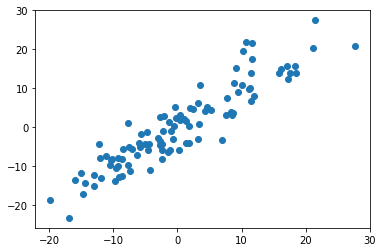

In [34]:
### Creating dataset
torch.manual_seed(2)
X = torch.randn(100,1)*10
Y = X + 4*torch.randn(100,1)
plt.plot(X.numpy(), Y.numpy(), 'o')
plt.show()

In [35]:
#Initializing linear regressor model
torch.manual_seed(1)
model = nn.Linear(in_features=1, out_features=1)

In [36]:
print (model.bias)
print (model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True)
Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [37]:
x = torch.tensor([[2.0], [3.0]])    #tensor should be float
model(x)

tensor([[0.5891],
        [1.1044]], grad_fn=<AddmmBackward>)

In [38]:
class LR(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.linear = nn.Linear(in_size, out_size)
    def forward(self, x):
        return self.linear(x)

In [39]:
model = LR(1, 1)
x = torch.tensor([[2.0], [3.0]])
model.forward(x)

tensor([[ 0.0816],
        [-0.1122]], grad_fn=<AddmmBackward>)

In [64]:
def get_params():
    w,b = model.parameters()
    return w[0][0].item(), b[0].item()

In [70]:
def plot_compare():
    w,b = get_params()
    x = np.array([-30,30])
    y = w*x + b
    plt.plot(x,y,'r')
    plt.scatter(X,Y)
    plt.show()

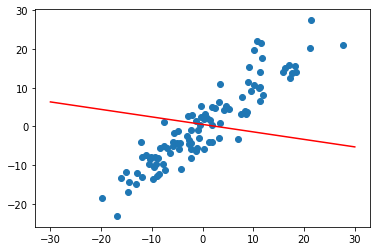

In [75]:
plot_compare()

In [86]:
#Training the linear model
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [87]:
epoch = 100
losses = []
for i in range(epoch):
    y_pred = model.forward(X)
    loss = loss_func(y_pred, Y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss)

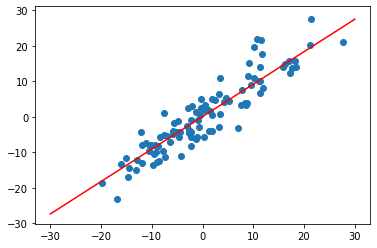

In [88]:
plot_compare()

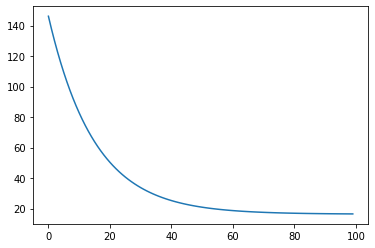

In [89]:
plt.plot(range(epoch), losses)